## Inleveropdracht - AOD 2023/2024

### Deadline: Woensdag 3 april 09:00

- Uitwerkingen in één document (notebook), per werkgroep
- Vermeld duidelijk de namen en studentnummers van iedereen in de groep! 
- Inleveren door up te loaden in blackboard (Course Content -> Inleveropgave -> Inleveropgave - notebook)

*Answers may be written in English or Dutch.*

*We gebruiken voor deze opdracht python via Jupyter Notebook, zorg er dus voor dat je Anaconda Navigator op je computer hebt! (zie pdf met uitleg op Blackboard)*

*Deze inleveropdracht bestaat uit een totaal van 3 opgaves. Je levert de antwoorden per werkgroep in: zorg ervoor dat iedereen bijdraagt en de antwoorden begrijpt!*

*Schrijf het geheel duidelijk op en lever het via blackboard in als 1 jupyter notebook. In zo'n notebook kun je cellen (zoals deze) als 'markdown' definieren om tekst te schrijven, en dan bijvoorbeeld ook (Latex) vergelijkingen toevoegen. We verwachten per opgave ongeveer 100 woorden aan toelichting en analyse van wat je ziet in de figuren.*

*De inlever-deadline is woensdag 3 april bij aanvang van het college, dus 09:00. Neem vooral contact op met de assistenten of docenten als er iets onduidelijk is!*

In deze tweede inleveropdracht gaan we kijken naar 'echte' data van de oceaan. We vergelijken het pad van een drifter in de oceaan met dat van inertiaal-cirkels, de geostrofe balans, en de Ekman balans. **Het doel is dus om te analyseren in hoeverre de theorie die je in AOD hebt geleerd ook echt toepasbaar is op oceaandata.**

De drifter die we gaan analyseren is in augustus 2019 te water gelaten in de Tropische Atlantische Oceaan, voor een project om sargassum zeewier te tracken. Zie voor eventuele achtergrond [het artikel van 23 juli in dit blog](https://www.nioz.nl/en/blog/niozatsea-rv-pelagia-sargassum-cruise-pe-455) en [dit wetenschappelijke artikel](https://www.frontiersin.org/articles/10.3389/fmars.2020.607426/full) (waar het de drifter met naam 'drifter14' is). Je kunt een animatie van de drifter vinden op http://oceanparcels.org/atlanticmap.html

We beginnen met het importeren van een aantal python modules. Als dit niet werkt, dan heb je waarschijnlijk niet de goede modules geinstalleeerd via Anaconda. Installeer in ieder geval
- xarray
- matplotlib
- numpy
- cartopy
- scipy

Dat kun je bijvoorbeeld via de volgende stappen doen
1. open Anaconda Prompt als administrator
2. Run de volgende code: `conda install xarray dask netCDF4 bottleneck`
3. type `y` om te bevestigen; even wachten tot installatie klaar is
4. Run de volgende code: `conda install -c conda-forge cartopy`
5. type `y` om te bevestigen; even wachten tot installatie klaar is


Je kunt checken of een package al geinstalleerd is binnen Anacona door in Anaconda Navigator, in Environments te zoeken naar de naam van het gewenste package.

In [1]:
# Importeren van benodigde packages
import numpy as np
import xarray as xr
import datetime
import json
import matplotlib.pyplot as plt
import cartopy
from icecream import ic 

Download dan van Blackboard de file `TrAtlDrifter14.json`, zet die in dezelfde directory, map of folder als je notebook en laad de data met de code hieronder

In [2]:
# Gegeven data importeren
with open('TrAtlDrifter.json') as fp:
    drifter = json.load(fp)

N = len(drifter)
lon = [drifter[i][2] for i in range(N)]
lat = [drifter[i][1] for i in range(N)]
time = [np.datetime64(drifter[i][0]) for i in range(N)]

Maak nu een simpele plot van longitude versus latitude van het traject van de drifter met `plt.plot(lon, lat)`

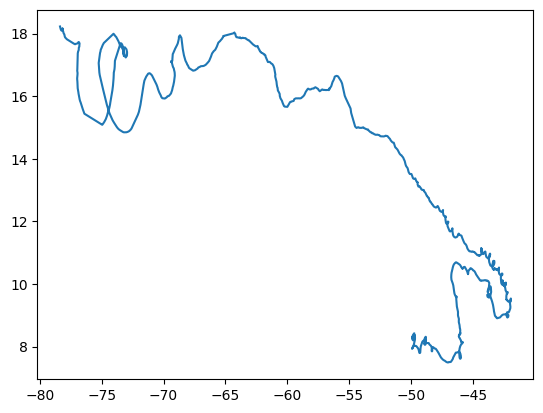

In [3]:
plt.plot(lon, lat)

We zien hierboven het traject van de boei. Ter orientatie: de boei is rond (50 $^\circ$ W, 8 $^\circ$ N) te water gelaten, en beweegt vanuit dat punt langzaam naar het noordwesten. Op het punt rond (80 $^\circ$ W, 18 $^\circ$ N) was de batterij op en stopt het traject dus.

Voor wat meer context over het traject kan het handig zijn ook de continenten te plotten. Hiervoor gebruiken we het `cartopy` package, bijvoorbeeld met de code hieronder. 

*Let op dat het, afhankelijk van de versie van je cartopy module, kan zijn dat je een aantal `warnings` ziet. Dat is niet erg, die waarschuwingen kun je negeren.*

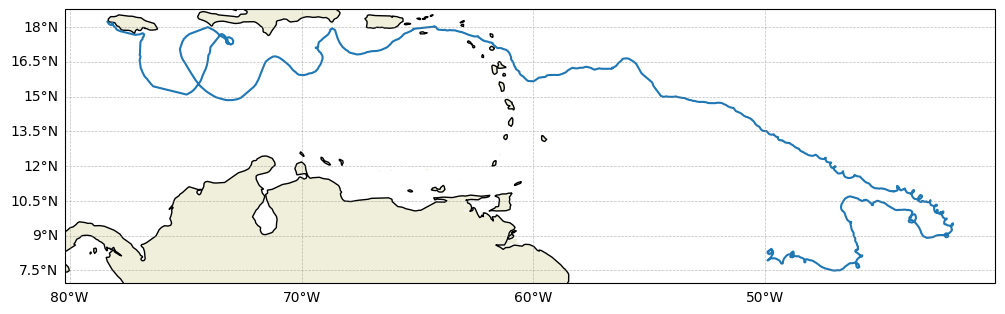

In [4]:
# We gebruiken hieronder de PlateCarree projectie
projection = cartopy.crs.PlateCarree()

# initialisatie van de figuur
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 1, 1, projection=projection)

# plot de kustlijnen en maak het land beige
ax.coastlines(resolution='50m')
ax.add_feature(cartopy.feature.LAND)

# plot het traject, let op dat we een transformatie moeten gebruiken naar cartopy.crs.PlateCarree(),
# ook als je hierboven de projectie hebt veranderd
ax.plot(lon, lat, transform=cartopy.crs.PlateCarree())

# de code hieronder plot lichtgrijze lijnen voor het longitude/latitude grid en zorgt voor goede formatiing van de labels
gl = ax.gridlines(crs=cartopy.crs.PlateCarree(), draw_labels=True, linewidth=0.5,
              color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xformatter = cartopy.mpl.gridliner.LONGITUDE_FORMATTER
gl.yformatter = cartopy.mpl.gridliner.LATITUDE_FORMATTER

#### Opgave 1: de inertiaal bewegingen? [20 punten]

Als je goed naar de plot hierboven kijkt, dan zie je tussen 45W en 42W een serie ellipses. Dit zouden wel eens inertiaalbewegingen kunnen zijn (zie ook slide 11 van HoorCollege 7). Schat aan de hand van de `lon`, `lat` en `time` data de periode van de oscillaties. In hoeverre komt dat overeen met de theoretische waarde voor de periode van inertiaaloscillaties op deze breedtegraad?

Hints:
- Maak eerst een plot van alleen het deel van het traject waar de vermoedelijke intertiaalbeweging het duidelijkst is. Dit is rond index 2000 in de lijsten `lon`, `lat` en `time`. Gebruik bijvoorbeeld `I = slice(index1, index2)` om een stukje van het traject te selecteren.
- Bereken dan de tijd tussen het begin en eind van dat deel van het traject waar de ellipses het duidelijkst zijn.
- Tel (met de hand, daar hoef je geen code voor te schrijven!) het aantal 'loops' dat de drifter heeft gemaakt in dat deel van het traject zodat je de periode per loop kunt berekenen.
- Vergelijk die periode per loop met de theoretische waarde van de inertiaalperiode op deze breedtegraad, bijvoorbeeld door het relatieve verschil tussen de twee periodes te berekenen.

De verlopen tijd van deze slice is 768 uur, 49 minuten & 27 seconden
Percentage verschil met theoretische waarde = 10.088176999062258%


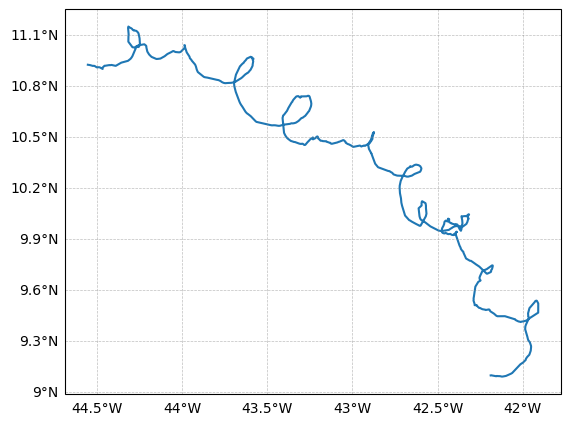

In [5]:
# Slice maken om stukken van de lijsten te selecteren
begin: int = 1900
eind: int = 2750
I: slice = slice(begin, eind)

# Tijdsverschil berekenen
tijd_begin: str = time[begin]
tijd_eind: str = time[eind]
tijd_verschil = tijd_eind - tijd_begin

# Naar een beter format zetten
tijd_verschil_seconds = tijd_verschil.astype('timedelta64[s]').astype(int)
hours, remainder = divmod(tijd_verschil_seconds, 3600)
minutes, seconds = divmod(remainder, 60)
formatted_time = '{:02} uur, {:02} minuten & {:02} seconden'.format(int(hours), int(minutes), int(seconds))
print(f"De verlopen tijd van deze slice is {formatted_time}")

# We gebruiken hieronder de PlateCarree projectie;
# op de Cartopy website kun je ook andere projecties vinden als je daar meet wilt spelen
projection = cartopy.crs.PlateCarree()

# initialisatie van de figuur
fig_slice = plt.figure(figsize=(12, 5))
ax_slice = fig_slice.add_subplot(1, 1, 1, projection=projection)

# plot de kustlijnen en maak het land beige
ax_slice.coastlines(resolution='50m')
ax_slice.add_feature(cartopy.feature.LAND)

# plot het traject, let op dat we een transformatie moeten gebruiken naar cartopy.crs.PlateCarree(),
# ook als je hierboven de projectie hebt veranderd
ax_slice.plot(lon[I], lat[I], transform=cartopy.crs.PlateCarree())

# de code hieronder plot lichtgrijze lijnen voor het longitude/latitude grid en zorgt voor goede formatiing van de labels
gl = ax_slice.gridlines(crs=cartopy.crs.PlateCarree(), draw_labels=True, linewidth=0.5,
              color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xformatter = cartopy.mpl.gridliner.LONGITUDE_FORMATTER
gl.yformatter = cartopy.mpl.gridliner.LATITUDE_FORMATTER

# Aantal loops in totaal van deze slice
loops: int = 10
tijd_per_loop = tijd_verschil / loops

# Berekenen van theoretische waarde
omega = 7.27*10**-5
phi = (np.pi/180)*10 # degrees radian
theoretische_waarde = np.pi / (omega * np.sin(phi))

# Relative verschil berekenen
relative_verschil = (tijd_per_loop.astype('timedelta64[s]').astype(int) - theoretische_waarde)/tijd_per_loop.astype('timedelta64[s]').astype(int)
print(f"Percentage verschil met theoretische waarde = {relative_verschil*100}%")

#### Opgave 2: de geostrofe balans? [60 punten totaal]

We gaan nu specifiek naar het gedeelte van het traject kijken tussen 11 januari 2020 en 17 januari 2020 (de indices 3694 tot 3959 in de lijsten `lon`, `lat` en `time`). We gaan onderzoeken in hoeverre de drifter de geostrofe balans volgt.

Daarvoor openen we een bestand van de Sea Surface Height (SSH) van de [Copernicus Marine Environmental Monitoring Service](https://marine.copernicus.eu/), een website van de Europese Unie waar allerhande oceaan-data gedownload kan worden. We hebben de file al op blackboard gezet als `global-analysis-forecast-phy-001-024_SSH.nc`. Download de file van blackboard, zet hem in dezelfde directory/map/folder als je notebook, open die file met het `xarray` package en plot vervolgens met de code hieronder.

De SSH data is dagelijks, maar we analyseren hier alleen het tijdsgemiddelde veld over de week waarin de data is verzameld. Je kunt het gemiddelde berekenen met `xr.mean('time')`.

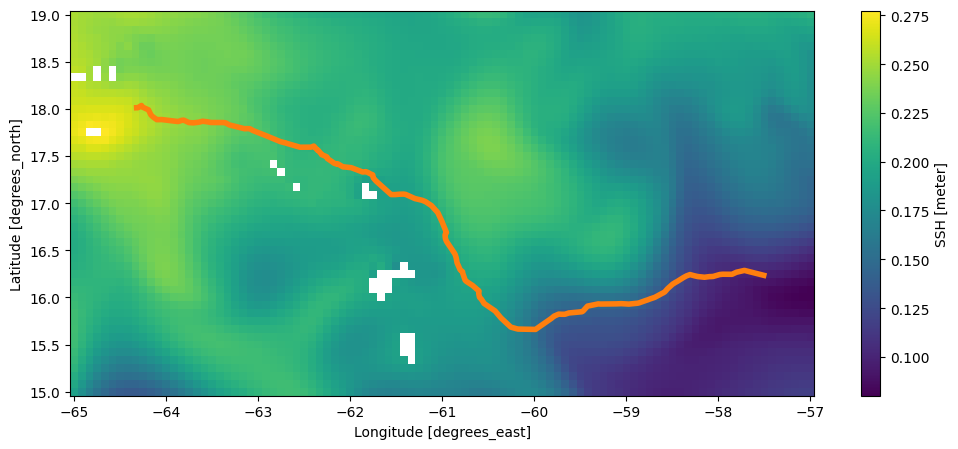

In [6]:
# initialisatie figuur
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 1, 1)

# openen van data en selecteren SSH
SSH = xr.open_dataset('global-analysis-forecast-phy-001-024_SSH.nc').zos.mean('time')
SSH.plot(ax=ax, cbar_kwargs=dict(label='SSH [meter]'))

# Plot ook het relevante gedeelte van het drifter-traject op de kaart
begin_SSH: int = 3694
eind_SSH: int = 3959
I = slice(begin_SSH, eind_SSH)

ax.plot(lon[I], lat[I], 'C01', linewidth=4);

**2a)** Wat zie je? En wat verwacht je te zien als de drifter de geostrofe balans zou volgen? [20 punten]

De drifter beweegt op ons figuur van oost naar west, en van een lage SSH naar hoge SSH. Deze zou op het noordelijk halfrond naar rechts afgebogen moeten worden bij een geostrofe balans vanwege de coriolis kracht. In ons figuur zien wij inderdaad dat deze drifter naar rechts afbuigt in de richting waarop die gaat (Naar het noorden dus). Wat naar onze mening duidelijker is, is dat de drifter om de eilanden (de witte vlekken) heen drijft. Dit is te verwachten binnen de theorie van de geostrofe balans, omdat hier het Taylor-Proudman theorem geldt. 

We kunnen ook op elk punt in het domein uitrekenen wat de lokale geostrofe snelheid $(u_g, v_g)$ zou zijn. Voor het gemak nemen we aan dat $f$ constant is over het domein. Je kunt gebruiken dat $1^\circ=111 km$ in zowel de $x$-richting en in de $y$-richting. 

**2b)** Geef hieronder de waardes voor de variabelen `g` (de gravitatieconstante), `corio` (de Coriolis-parameter) en `dx` en `dy` (de afstand van $1^\circ$ in m). [10 punten]

In [7]:
# Variabelen initiëren
g = -9.81 # Zwaartekracht in m/s^2
corio = 2 * omega * np.sin(16.5) # Coriolis-parameter (Omega was al gedefinieërd)
dx = 7 * 111 * 10**3 # Verschil afstand in meters (oost/west)
dy = 2.5 * 111 * 10**3 # Verschil afstand in meters (noord/zuid)

Voor het berekenen van een gradient heeft `xarray` de heel handige [`xr.differentiate()`](http://xarray.pydata.org/en/stable/generated/xarray.DataArray.differentiate.html) functie, waarbij je als argument de naam van de dimensie (`longitude` of `latitude`) moet meegeven. 

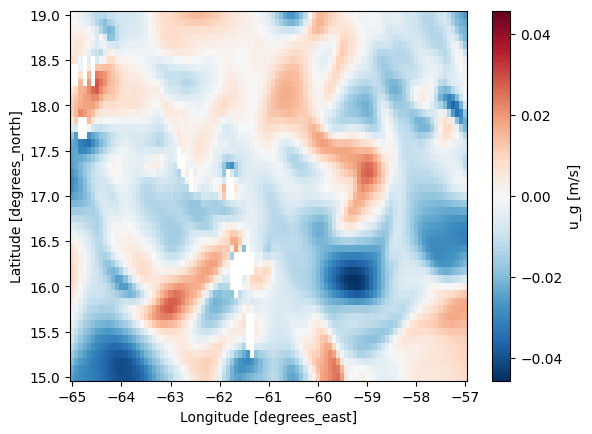

In [8]:
# Geostrofe snelheid in de oost-west richting
u_geostroof = -g/corio*SSH.differentiate('latitude')/dy
u_geostroof.plot(cbar_kwargs=dict(label='u_g [m/s]'))

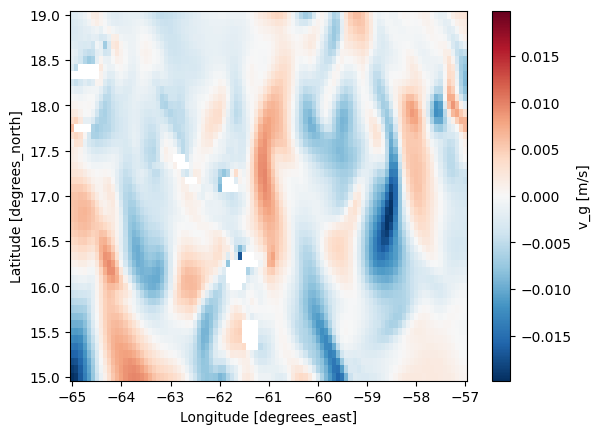

In [9]:
# Geostrofe snelheid in de noord-zuid richting
v_geostroof = g/corio*SSH.differentiate('longitude')/dx
v_geostroof.plot(cbar_kwargs=dict(label='v_g [m/s]'))

We kunnen de snelheid van de drifter berekenen door de gradient van positie te nemen ($u = dx/dt$). Gebruik daarvoor de functie `np.gradient(position, time)` waarbij `position` of `lon[I]` of `lat[I]` is. Vergeet niet van graden naar meters om te rekenen. 

**2c)** Geef zowel de $x$- als $y$-componenten van de drifter snelheid. [10 punten]

Een moeilijkheid in deze berekening is dat `np.gradient` een integer verwacht. We moeten `time` dus naar integers omschrijven: `time_int = [t.astype('datetime64[s]').astype('int64') for t in time[I]]`

In [10]:
# Tijd omschrijven naar type int64
t_SSH_int = [t.astype('datetime64[s]').astype('int64') for t in time[I]]

# Lat en lon naar meter omschrijven naar meters
lat_meter = [item*111e3 for item in lat[I]]
lon_meter = [item*111e3 for item in lon[I]]

# Snelheden in x en y richting berekenen
v_drifter_rad = np.gradient(lat[I], t_SSH_int)
u_drifter_rad = np.gradient(lon[I], t_SSH_int)

# Snelheiden omschrijven van rad/s naar m/s
u_drifter = [item*111e3 for item in u_drifter_rad]
v_drifter = [item*111e3 for item in v_drifter_rad]

Nu willen we deze drifter snelheden vergelijken met de geostrofe snelheden _op de posities van de drifter_. Daarvoor kunnen we de `xr.interp()` functie gebruiken, maar vanwege een (irrelevante) subtiliteit in xarray interpolatie (zie [hier](http://xarray.pydata.org/en/stable/interpolation.html#advanced-interpolation) voor meer info, als je benieuwd bent) moeten we eerst twee nieuwe variabelen definieren voor het pad van de drifters:

In [11]:
pathlons = xr.DataArray(lon[I], dims='time')
pathlats = xr.DataArray(lat[I], dims='time')

Nu kunnen we heel makkelijk de geostrofe snelheid op het pad van de drifter (`ug_d, vg_d`) berekenen:

In [12]:
u_geostroof_drifter = u_geostroof.interp(longitude=pathlons, latitude=pathlats)
v_geostroof_drifter = v_geostroof.interp(longitude=pathlons, latitude=pathlats)

Om te analyseren in hoerverre de drifter de geostrofe balans volgt, kunnen we nu de hoek _tussen_ de drifter snelheid en de geostrofe snelheid berekenen. Daarvoor berekenen we het inproduct tussen de genormaliseerde (`ud, vd`) en de (`ug_d, vg_d`) vectoren:

In [13]:
# functie om de vector te normaliseren
def unit_vector(vector):
    return vector / np.linalg.norm(vector)

# functie om het in-product te berekenen
def inp(v1, v2):
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return np.dot(v1_u, v2_u)

# Inproduct tussen de geostrofe snelheid van de drifter en de daadwerkelijke snelheid van de drifter
# Om te zien wat de overeenkomst is tussen deze twee.
inp_g = [inp(
    ([v_drifter[i], u_drifter[i]]),
    ([v_geostroof_drifter.values[i], u_geostroof_drifter.values[i]])
) for i in range(I.stop-I.start)]

Je kunt de geostrofe stromingen op de Sea Surface Height figuur plotten met behulp van 'quivers' met de code hieronder. 

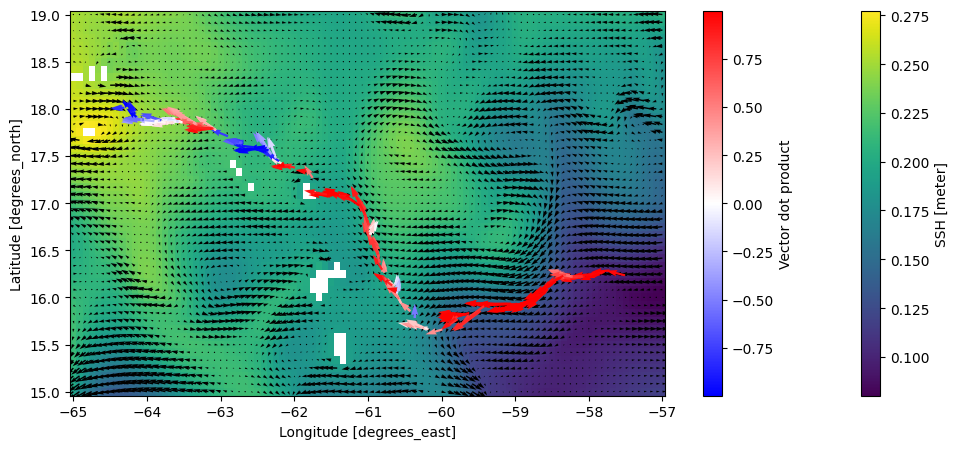

In [14]:
# Figuur initialiseren
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 1, 1)

# Waterhoogte plotten
SSH.plot(ax=ax, cbar_kwargs=dict(label='SSH [meter]'))  # we nemen hier de tijdsgemiddelde, voor het gemak
ax.quiver(SSH.longitude, SSH.latitude, u_geostroof, v_geostroof) # Geostrofe vectoren plotten
cb = ax.quiver(lon[I], lat[I], u_drifter, v_drifter, inp_g, cmap='bwr') # Richtingsvectoren plotten met inproduct
plt.colorbar(cb, label='Vector dot product')

**2d)** Kloppen (de richting van) de pijlen met de geostrofe balans? Waar kloppen ze het best? Waar kloppen ze het slechtst? [20 punten]

Over de richting van onze vectoren kunnen we zeggen dat deze corresponderen met die van de Noord-Atlandtische gyre, die door zijn kleine Rossby getal voldoet aan geostrofe stroming. Dit weten we omdat er veel vectoren rood gekleurd zijn, wat laat zien dat er tussen de onze data en de bestaande geostrofe stroming veel overeenkomsten bestaan. Echter, wanneer we de stroom dichterbij (ei)land gaan vergelijken, vinden we wel een verschil met de hoofdstroom. We kunnen aflezen uit de gegevens over de Sea Surface Height dat het water loop van ons traject steeds warmer wordt. Dit weten we omdat het zeeniveau in meters toeneemt en warm water een lagere dichtheid heeft dan koud water, dus hogere gebieden doorgaans warmer zijn dan lagere gebieden. Deze hoger gelegen gebieden zijn dan gevoeliger voor invloed van de dominantie Oostenwind in dit gebied, die het water naar het Westen stuwt waar de geostrofe stroming noordwaarts zou willen. Dit veroorzaakt uiteindelijk het verschil dat we terugzien als blauwe vectorpijlen.

#### Opgave 3: de Ekman balans [20 punten]

We kunnen een zelfde soort analyse doen van de Ekman balans, door de wind stress te analyseren. Daarvoor openen we twee files van (de tijdsgemiddelde) TauX and TauY van de [Copernicus Marine Environmental Monitoring Service](https://marine.copernicus.eu/), die wederom op Blackboard staan.

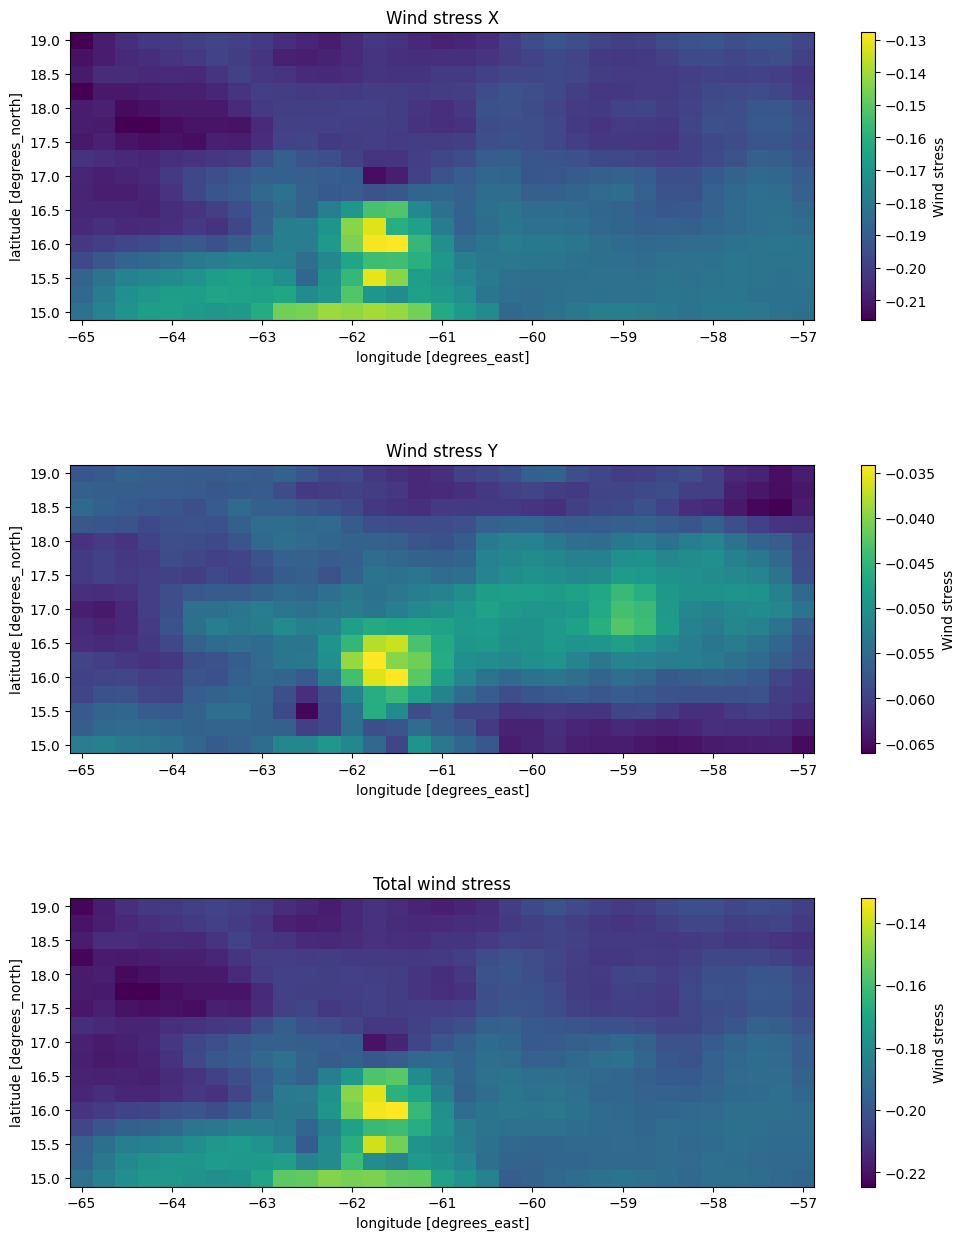

In [17]:
TauX = xr.open_dataset('CERSAT-GLO-BLENDED_WIND_L4-V6-OBS_FULL_TIME_SERIE_TauX.nc').surface_downward_eastward_stress.mean('time')
TauY = xr.open_dataset('CERSAT-GLO-BLENDED_WIND_L4-V6-OBS_FULL_TIME_SERIE_TauY.nc').surface_downward_northward_stress.mean('time')

# initialisatie figuur
fig, axs = plt.subplots(3, figsize=(12, 15))

TauX.plot(ax=axs[0], cbar_kwargs=dict(label='Wind stress'))
TauY.plot(ax=axs[1], cbar_kwargs=dict(label='Wind stress'))

Tau_general = -np.hypot(TauX, TauY)
Tau_general.plot(ax=axs[2], cbar_kwargs=dict(label='Wind stress'))

axs[0].set_title('Wind stress X')
axs[1].set_title('Wind stress Y')
axs[2].set_title('Total wind stress')

plt.subplots_adjust(hspace=0.5)

In hoeverre volgt de drifter de Ekman balans? Herhaal de analyse van na vraag 2c, maar dan met de wind vectoren in plaats van de geostrofe vectoren. Maak ook weer een kaart, waar je nu ook een `quiver` van de wind vectoren intekent.

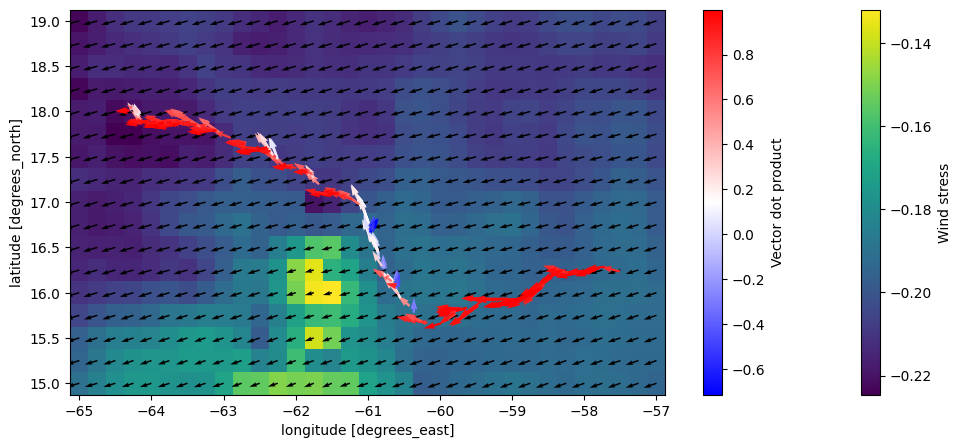

In [16]:
u_Tau_drifter = TauX.interp(lon=pathlons, lat=pathlats)
v_Tau_drifter = TauY.interp(lon=pathlons, lat=pathlats)

inp_g_Tau = [inp(
    ([u_drifter[i], v_drifter[i]]),
    ([u_Tau_drifter.values[i], v_Tau_drifter.values[i]])
) for i in range(I.stop-I.start)]

# Figuur initialiseren
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 1, 1)

# Waterhoogte plotten
Tau_general.plot(ax=ax, cbar_kwargs=dict(label='Wind stress'))  # we nemen hier de tijdsgemiddelde, voor het gemak
ax.quiver(TauX.lon, TauY.lat, TauX, TauY) # Geostrofe X vectoren plotten
cb = ax.quiver(lon[I], lat[I], u_drifter, v_drifter, inp_g_Tau, cmap='bwr') # Richtingsvectoren plotten met inproduct
plt.colorbar(cb, label='Vector dot product')

Wat zie je? Waarom ziet het wind veld er veel 'gladder' uit dan het geostrofe stromingenveld? Wat verwacht je van het inproduct als de drifter (die op het oceaanoppervlak ligt) de Ekman balans volgt?

#### EINDE